# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

#### 2016 US presidential elections

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1583340806569-6da3d5ea9911?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1315&q=80" /></div>

In 2016, Donald Trump lost the popular vote, yet he won the electoral vote, securing 4 years in the Oval Office. This has been a shock to democrat supporters all around the world.

Imagine you travel back in time to 2016. As soon as you step out of your time-capsule, the Democratic Party hires you. They want you, the best data scientist across the time and space, **to explain what happened and what should have been done differently**. They want you to **prepare them for 2020 presidential elections**.

The Party has some tips for you - inspect the voters. What are Trump supporters? What do they feature? What are our supporters? Where should focus next? Any pro-trump states? Cities?

The Democrats were kind of enough to share [a Kaggle dataset](https://www.kaggle.com/benhamner/2016-us-election) with you on 2016 U.S. elections. Use the data to help the Democrats.

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Your are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')
df_time = pd.read_csv('/content/drive/MyDrive/DataSets/covid/Time.csv')
df_time_province = pd.read_csv('/content/drive/MyDrive/DataSets/covid/TimeProvince.csv')
df_time_gender = pd.read_csv('/content/drive/MyDrive/DataSets/covid/TimeGender.csv')
df_time_age = pd.read_csv('/content/drive/MyDrive/DataSets/covid/TimeAge.csv')
df_region = pd.read_csv('/content/drive/MyDrive/DataSets/covid/Region.csv')
df_policy = pd.read_csv('/content/drive/MyDrive/DataSets/covid/Policy.csv')
df_patient = pd.read_csv('/content/drive/MyDrive/DataSets/covid/PatientInfo.csv')
df_case = pd.read_csv('/content/drive/MyDrive/DataSets/covid/Case.csv')
df_weather = pd.read_csv('/content/drive/MyDrive/DataSets/covid/Weather.csv')

Mounted at /content/drive


In [3]:
# cases per province, counting 3 provinces with the most cases and then looking at plot how number of cases distributed per tim
cases_per_province = df_time_province[['province', 'confirmed']].groupby('province').sum().reset_index().sort_values('confirmed', ascending=False)
print(cases_per_province)
max_cases_provinces = cases_per_province['province'][0:3]
df_time_max_provinces = df_time_province[df_time_province['province'].isin(max_cases_provinces)]
df_time_max_provinces['date'] = pd.to_datetime(df_time_max_provinces['date'])

             province  confirmed
3               Daegu     807506
8    Gyeongsangbuk-do     161079
15              Seoul      81923
7         Gyeonggi-do      81059
2   Chungcheongnam-do      16780
10            Incheon      16645
0               Busan      16341
9    Gyeongsangnam-do      13860
5          Gangwon-do       5908
1   Chungcheongbuk-do       5801
16              Ulsan       5269
4             Daejeon       5217
14             Sejong       5111
6             Gwangju       3359
12       Jeollabuk-do       2108
13       Jeollanam-do       1763
11            Jeju-do       1449


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


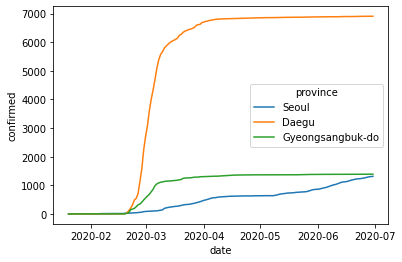

In [4]:
sns.lineplot(x='date', y='confirmed', data=df_time_max_provinces, hue='province')

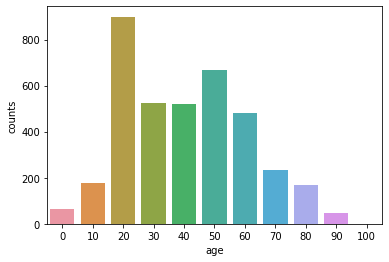

In [5]:
cases_per_age = df_patient['age'].dropna().value_counts().rename_axis('age').reset_index(name='counts')
cases_per_age['age'] = cases_per_age['age'].str.replace(r's', '')
cases_per_age = cases_per_age.astype(int).sort_values('age')
sns.barplot(x='age', y='counts', data=cases_per_age)

In [6]:
cases_per_age_gender = df_patient[['age', 'sex', 'patient_id']].dropna().groupby(['age', 'sex']).count().reset_index()
cases_per_age_gender['age'] = cases_per_age_gender['age'].str.replace(r's', '')
cases_per_age_gender['age'] = cases_per_age_gender['age'].astype(int)
cases_per_age_gender = cases_per_age_gender.sort_values('age')
cases_per_age_gender

,age,sex,patient_id
0,0,female,28
1,0,male,38
3,10,female,68
4,10,male,110
5,20,female,457
6,20,male,440
7,30,female,242
8,30,male,281
9,40,female,307
10,40,male,210


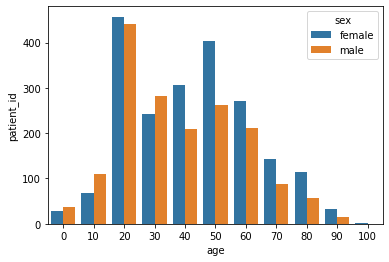

In [7]:
sns.barplot(x='age', y='patient_id', hue='sex', data=cases_per_age_gender)

In [8]:
df_time['date'] = pd.to_datetime(df_time['date'])
df_time_melted = pd.melt(df_time, id_vars=['date', 'time'], value_vars=['confirmed', 'released', 'deceased'])
df_time_melted

,date,time,variable,value
0,2020-01-20,16,confirmed,1
1,2020-01-21,16,confirmed,1
2,2020-01-22,16,confirmed,1
3,2020-01-23,16,confirmed,1
4,2020-01-24,16,confirmed,2
...,...,...,...,...
484,2020-06-26,0,deceased,282
485,2020-06-27,0,deceased,282
486,2020-06-28,0,deceased,282
487,2020-06-29,0,deceased,282


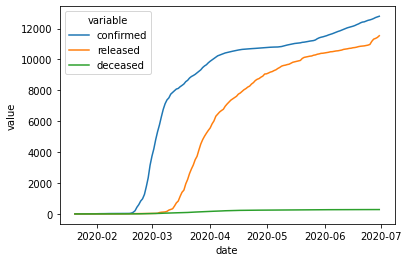

In [9]:
sns.lineplot(x='date', y='value', data=df_time_melted, hue='variable')

In [10]:
df_time['day_of_week'] = df_time['date'].dt.day_name()
cases_per_weekday = df_time[['day_of_week', 'confirmed']].groupby('day_of_week').agg(['mean', 'std']).reset_index()
cases_per_weekday

day_of_week    confirmed             
                      mean          std
0      Friday  7845.434783  4730.681162
1      Monday  7758.708333  4825.714964
2    Saturday  7949.782609  4686.222116
3      Sunday  8028.782609  4660.826175
4    Thursday  7761.347826  4761.838621
5     Tuesday  7822.083333  4813.823653
6   Wednesday  7681.782609  4787.486349

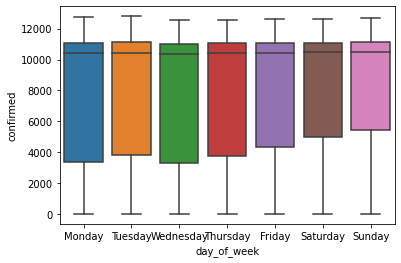

In [11]:
sns.boxplot(x="day_of_week", y="confirmed", data=df_time)

In [12]:
contact_counts = df_patient['contact_number'].str.replace(r'-', '0').value_counts()[df_patient['contact_number'].value_counts()> 2].rename_axis('contacts').reset_index(name='counts')
contact_counts['contacts'] = contact_counts['contacts'].astype(int)
contact_counts = contact_counts.sort_values('contacts')
contact_counts

,contacts,counts
2,0,87
3,1,87
1,2,92
0,3,96
4,4,51
5,5,43
6,6,24
8,7,20
11,8,18
7,9,21


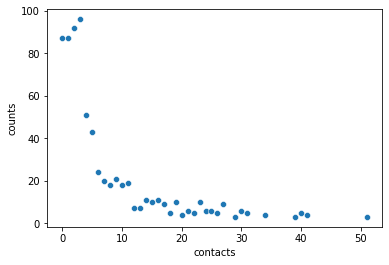

In [13]:
sns.scatterplot(x='contacts', y='counts', data=contact_counts)

In [14]:
a = df_patient
a = a[['sex', 'confirmed_date']].value_counts().reset_index(name='counts')
a

,sex,confirmed_date,counts
0,female,2020-03-05,98
1,female,2020-02-28,83
2,female,2020-03-04,77
3,female,2020-03-01,71
4,female,2020-02-27,66
...,...,...,...
280,female,2020-05-08,1
281,female,2020-05-06,1
282,female,2020-05-03,1
283,female,2020-04-30,1


In [15]:
import scipy.stats as ss
from statsmodels.stats.weightstats import ztest

foo = a[["sex", "confirmed_date", "counts"]].pivot(index="confirmed_date", columns="sex")["counts"].reset_index()[["female", "male"]].dropna()
t_stat_PE, t_pval_PE = ss.ttest_ind(foo.female,foo.male)
z_stat_PE, z_pval_PE = ztest(x1=foo.female, x2=foo.male, value=0, alternative='two-sided')
t_stat_PE, t_pval_PE, z_stat_PE, z_pval_PE

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1.420155071967101, 0.1567077194174156, 1.420155071967101, 0.15556254019154597)

In [16]:
cases_age_pivot = df_time_age[['date', 'age', 'confirmed']].pivot(index='date', columns='age')['confirmed'].reset_index().dropna()
cases_age_pivot.var()

age
0s       1313.386501
10s     12629.793664
20s    180382.569421
30s     44459.733884
40s     41439.802066
50s     75748.836088
60s     50518.356612
70s     16423.797107
80s     11757.224931
dtype: float64

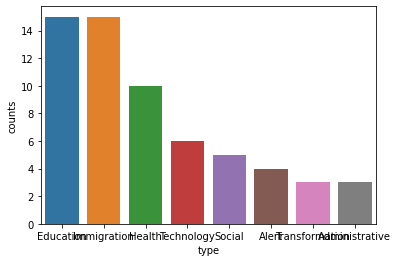

In [ ]:
df_policy['start_date'] = pd.to_datetime(df_policy['start_date'])
df_policy['end_date'] = pd.to_datetime(df_policy['end_date'])
policy_types_count = df_policy['type'].value_counts().rename_axis('type').reset_index(name='counts')
policy_types_count
sns.barplot(x='type', y='counts', data=policy_types_count)

In [ ]:
gov_policy_count = df_policy[['type', 'gov_policy']].value_counts().reset_index(name='counts').sort_values('type', ascending=False)
gov_policy_count

,type,gov_policy,counts
6,Transformation,Wearing of masks,2
14,Transformation,Logistics center,1
22,Technology,Self-Quarantine Safety Protection App,1
21,Technology,Self-Diagnosis App,1
20,Technology,Open Data,1
19,Technology,Open API,1
18,Technology,KI-Pass: Korea Internet - Pass,1
17,Technology,Electronic Wristbands,1
5,Social,Social Distancing Campaign,4
16,Social,Thanks to Challenge korea,1


In [ ]:
foo = df_policy[['type', 'start_date']].value_counts().reset_index(name='counts').sort_values('start_date')
foo['start_date'] = pd.to_datetime(foo['start_date'])

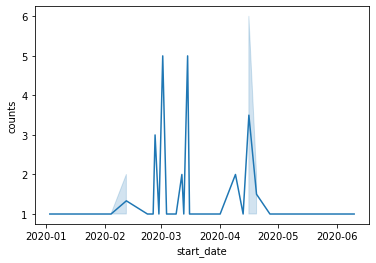

In [ ]:
sns.lineplot(x='start_date', y='counts', data=foo)

ValueError: ignored

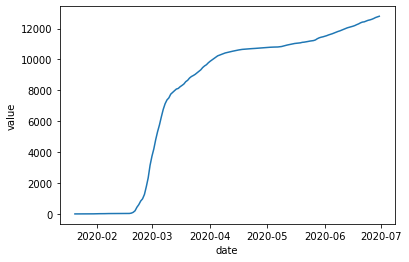

In [ ]:
import matplotlib.pyplot as plt

df_time_confirmed_melted = df_time_melted
df_time_confirmed_melted = df_time_confirmed_melted[df_time_confirmed_melted['variable'] == 'confirmed']
sns.lineplot(data=df_time_confirmed_melted, x='date', y='value')

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.